In [1]:
# Setup
from dotenv import dotenv_values
config = dotenv_values()
from pprint import pprint
from pybea.client import BureauEconomicAnalysisClient
from pprint import PrettyPrinter
import pandas as pd
import requests
import json

pd.set_option("display.max_rows", None)
bea = BureauEconomicAnalysisClient(api_key=config["BEA_API_KEY"])
pp = PrettyPrinter(indent=2)

## GDP data for Finance and Insurance industry

In [2]:
gdp_by_industry = bea.gdp_by_industry(
  year=["2020"], 
  industry="52", 
  frequency="A"
)
dimensions = gdp_by_industry["BEAAPI"]["Results"][0]["Dimensions"]
data = gdp_by_industry["BEAAPI"]["Results"][0]["Data"]

https://apps.bea.gov/api/data/?userid=99A288B9-A3A9-46E5-920E-78C20F5499C0&method=GetData&datasetname=GDPbyIndustry&year=2020&resultformat=JSON&industry=52&frequency=A&tableid=ALL


In [3]:
df = pd.DataFrame(
  [pd.Series(series.values(), index=series.keys()) for series in data]
).astype({"DataValue": float})
df

,TableID,Frequency,Year,Quarter,Industry,IndustrYDescription,DataValue,NoteRef
0,1,A,2020,2020,52,Finance and insurance,1787.700,1
1,5,A,2020,2020,52,Finance and insurance,8.600,5
2,6,A,2020,2020,52,Finance and insurance,1787.700,6
3,6,A,2020,2020,52,Compensation of employees,913.800,6
4,6,A,2020,2020,52,Taxes on production and imports less subsidies,64.100,6
5,6,A,2020,2020,52,Gross operating surplus,809.800,6
6,7,A,2020,2020,52,Gross operating surplus,45.300,7
7,7,A,2020,2020,52,Taxes on production and imports less subsidies,3.600,7
8,7,A,2020,2020,52,Compensation of employees,51.100,7
9,7,A,2020,2020,52,Finance and insurance,100.000,7


In [51]:
def bea_api(**kwargs):
  """
  Returns the api response from bureau of economic analysis of usa
  params for this method are provided to the get query.
  Refer to bea api documentation for details on the params:
  https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf
  """
  bea_response_text = requests.get("https://apps.bea.gov/api/data", params={
    "UserID": config["BEA_API_KEY"],
    "ResultFormat": "JSON",
    **kwargs  
  }).text
  bea_json = json.loads(bea_response_text)["BEAAPI"]
  return bea_json["Request"], bea_json["Results"]

def create_df(data):
  return pd.DataFrame([pd.Series(row.values(), index=row.keys()) for row in data])

In [52]:
request, results = bea_api(
  method="GetParameterValues", 
  datasetName="Regional", 
  parameterName="TableName"
)

In [54]:
dataset_list_df = create_df(results["ParamValue"])
dataset_list_df

,Key,Desc
0,CAEMP25N,Total Full-Time and Part-Time Employment by NA...
1,CAEMP25S,Total Full-Time and Part-Time Employment by SI...
2,CAGDP1,Gross Domestic Product (GDP) summary by county...
3,CAGDP11,Contributions to percent change in real GDP (N...
4,CAGDP2,Gross domestic product (GDP) by county and met...
5,CAGDP8,Chain-type quantity indexes for real GDP by co...
6,CAGDP9,Real GDP by county and metropolitan area (NAICS)
7,CAINC1,"Personal Income Summary: Personal Income, Popu..."
8,CAINC30,Economic Profile (Non-Industry)
9,CAINC35,Personal Current Transfer Receipts (Non-Industry)


In [7]:
request, results = bea_api(
  datasetName="Regional",
  method="getData",
  geofips="DE",
  tableName="CAINC1",
  lineCode=3,
  year="2020"
)


In [55]:
_,results = bea_api(
  method="getDatasetList",
) 
dataset_list_df = create_df(results["Dataset"])
dataset_list_df

,DatasetName,DatasetDescription
0,NIPA,Standard NIPA tables
1,NIUnderlyingDetail,Standard NI underlying detail tables
2,MNE,Multinational Enterprises
3,FixedAssets,Standard Fixed Assets tables
4,ITA,International Transactions Accounts
5,IIP,International Investment Position
6,InputOutput,Input-Output Data
7,IntlServTrade,International Services Trade
8,GDPbyIndustry,GDP by Industry
9,Regional,Regional data sets


In [77]:
_, results = bea_api(
  method="getParameterList",
  datasetName="GdpByIndustry",
)
create_df(results["Parameter"])

,ParameterName,ParameterDataType,ParameterDescription,ParameterIsRequiredFlag,ParameterDefaultValue,MultipleAcceptedFlag,AllValue
0,Frequency,string,"A - Annual, Q-Quarterly",1,,1,ALL
1,Industry,string,List of industries to retrieve (ALL for All),1,,1,ALL
2,TableID,integer,The unique GDP by Industry table identifier (A...,1,,1,ALL
3,Year,integer,List of year(s) of data to retrieve (ALL for All),1,,1,ALL


In [80]:
create_df(results["Parameter"]).style.set_properties(subset=["ParameterDescription"], width="400px")

,ParameterName,ParameterDataType,ParameterDescription,ParameterIsRequiredFlag,ParameterDefaultValue,MultipleAcceptedFlag,AllValue
0,Frequency,string,"A - Annual, Q-Quarterly",1,,1,ALL
1,Industry,string,List of industries to retrieve (ALL for All),1,,1,ALL
2,TableID,integer,The unique GDP by Industry table identifier (ALL for All),1,,1,ALL
3,Year,integer,List of year(s) of data to retrieve (ALL for All),1,,1,ALL


In [59]:
_, results = bea_api(
  method="getParameterValues",
  datasetName="GdpByIndustry",
  parameterName="Industry"
)
gdp_by_industry_param_values = create_df(results["ParamValue"])

In [60]:
gdp_by_industry_param_values.query("Desc.str.contains('Comp')")

,Key,Desc
24,334,"Computer and electronic products (A,Q)"
62,5415,Computer systems design and related services (...


In [69]:
_, results = bea_api(
  method="getData",
  datasetName="GdpByIndustry",
  parameterName="Industry",
  year="2020",
  frequency="A",
  industry="5415",
  tableId="All"
)

In [70]:
gdp_by_industry_comp = create_df(results[0]["Data"]).astype({"DataValue": float, "Year": int})
gdp_by_industry_comp


,TableID,Frequency,Year,Quarter,Industry,IndustrYDescription,DataValue,NoteRef
0,1,A,2020,2020,5415,Computer systems design and related services,366.600,1
1,5,A,2020,2020,5415,Computer systems design and related services,1.800,5
2,6,A,2020,2020,5415,Gross operating surplus,43.600,6
3,6,A,2020,2020,5415,Taxes on production and imports less subsidies,-4.300,6
4,6,A,2020,2020,5415,Compensation of employees,327.300,6
5,6,A,2020,2020,5415,Computer systems design and related services,366.600,6
6,7,A,2020,2020,5415,Gross operating surplus,11.900,7
7,7,A,2020,2020,5415,Taxes on production and imports less subsidies,-1.200,7
8,7,A,2020,2020,5415,Compensation of employees,89.300,7
9,7,A,2020,2020,5415,Computer systems design and related services,100.000,7


<AxesSubplot:xlabel='TableID'>

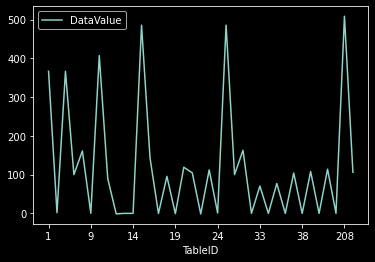

In [73]:
gdp_by_industry_comp.query("IndustrYDescription.str.startswith('Computer')").plot(x="TableID", y="DataValue")